In [1]:
import numpy as np
import dimarray as da
import glob
from matplotlib import pylab as plt
import numpy as np
import dimarray as da#
from matplotlib import pylab as plt
from matplotlib import ticker, cm, colors
import cmocean
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import os
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
from scipy import stats
import matplotlib.colors
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
p_climato= '/home/beckmann/mnt/climato/mapi/output/PISM_intern/output_PISM/'

#### PLot like ALison

In [21]:
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
import numpy.ma as ma
import xarray as xr
import matplotlib as mpl
def norm_cmap(cmap,bounds):
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return norm


def def_cmaps():
    cmap_Puor = plt.get_cmap('PuOr')
    cmap_seq = plt.get_cmap ('plasma')#('viridis')
    cmap_smb = plt.get_cmap('YlGnBu')
    cmap_qual = plt.get_cmap('tab10')
    cmap_div = plt.get_cmap('BrBG') # RdBu_r
    cmap_BuRd = plt.get_cmap('RdBu_r')
    obs_color = plt.get_cmap('plasma')(0.45)
    sh_color = plt.get_cmap('gray')(0.5)
    cmap_sh =  plt.get_cmap('terrain')
    cmap_blues = plt.get_cmap('Blues')
    cmap_reds = plt.get_cmap('Reds')
    return cmap_seq, cmap_smb, cmap_div, cmap_qual, cmap_BuRd, obs_color, sh_color,cmap_Puor, cmap_sh, cmap_blues, cmap_reds

sh_color = plt.get_cmap('gray')(0.5)

cmap_seq, cmap_smb, cmap_div, cmap_qual, cmap_BuRd, obs_color, sh_color, cmap_Puor, cmap_sh, cmap_blues, cmap_reds = def_cmaps()


def plot(var,sig,ax,y1,y2,cmap=cmap_BuRd): 
#par pre def: cmap blue red, mais tu peux changer dans l'appel de la fonction
    dataplot=ma.array(datatoplot[var],mask=ice2)
    if var == 'diff_uv_signi' or var == 'diff_uv_no_signi' or var == 'ano_uv_cp_no_signi' or var == 'ano_uv_cp_signi' or var == 'ano_uv_mf_no_signi' or var == 'ano_uv_mf_signi':
        #bounds=np.arange(-1.6,1.8,0.2).tolist()
        bounds=[-1.8,-1.5,-1.2,-0.9,-0.6,-0.3,-0.,0.3,0.6,0.9,1.2,1.5,1.8]
        extend='both'
        dataplot=ma.array(datatoplot[var])
    if var == 'uv_cp' or var == 'uv_ref':
        bounds=np.arange(2,11,1).tolist()
        extend='max'
        dataplot=ma.array(datatoplot[var],mask=land)

 
    if sig == 'signi':
        ax.pcolormesh(x2D+dh, y2D+dh,dataplot,cmap=cmap,norm=norm_cmap(cmap,bounds))
    elif sig == 'no_signi':
        grey1 = '#BEBEBE'
        plt.pcolor(x2D + dh, y2D + dh,dataplot , cmap=cmap, hatch='////', edgecolor=grey1, linewidth=0.0,
                   norm=norm_cmap(cmap, bounds))
    ax.contour(x2D,y2D,land,[0.5],linewidths=0.45,colors='k')
    ax.contour(x2D,y2D,ice2,[0.5],linewidths=0.45,colors='grey')
    
    plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
    plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])

   
    return var,cmap,bounds,extend
def make_ice_only_mask(mask_oo):
    numbers = [1,4]
    for n in numbers:

        m = mask_oo == n
        mask_oo[m] = 0
    numbers = [2,3]
    for n in numbers:

        m = mask_oo== n
        mask_oo[m] = 1
    return(mask_oo)

In [4]:
left, right, top, bottom = 0.05, 0.25, 0.1, 0.02
wspace = 0.26
wcbar = 0.125
inv = xr.open_dataset('./inv-4.5km-marfix.nc',decode_times=False)
dates = pd.date_range('2200-01-01','2200-01-01', freq='AS')
inv['time'] = dates
msk_ice=inv['MSK_MAR'] #msk MAR no cp 1991
msk_2200=inv['MSK_MAR2200'].sel(time='2200-01-01')
topo_end=inv['SH2200'].sel(time='2200-01-01')
topo_start=inv['SRF']

ice_ref = xr.open_dataset('./ICE_1961-1990_4.5km_marfix_nocorr.nc',decode_times=False)
dates = pd.date_range('1961-01-01','1990-01-01', freq='AS')
ice_ref['time'] = dates

topo=ice_ref['SRF']
sol2 = xr.ones_like(inv['SRF']).where(topo>0)
land2 = (1-(sol2/sol2)).where(sol2>0,1)


ice2200=(msk_2200.where(msk_2200>1.5,1))


XX = inv['x']
YY = inv['y']
lon = inv['LON']
lat = inv['LAT']

lon2D= lon
lat2D= lat


x2D, y2D = np.meshgrid(XX, YY) 



# ddx = d_thk0.x[0]-d_thk0.x[-1]
# ddy = d_thk0.y[0]-d_thk0.y[-1]
# ratio = ddx/ddy
ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddx.values/ddy.values


h = 2.2
w = (h*0.96*ratio+wspace+wcbar)
fw = 4*w + left + right
fh = 1*h + top  + bottom


In [5]:
####### PLOT FUNCTIONS ###########################

def norm_cmap(cmap,bounds):
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return norm
def def_cmaps():
    cmap_Puor = plt.get_cmap('PuOr')
    cmap_seq = plt.get_cmap ('plasma')#('viridis')
    cmap_smb = plt.get_cmap('YlGnBu')
    cmap_qual = plt.get_cmap('tab10')
    cmap_div = plt.get_cmap('BrBG') # RdBu_r
    cmap_BuRd = plt.get_cmap('RdBu_r')
    cmap_RdBu = plt.get_cmap('RdBu')
    
    cmap_Rd = plt.get_cmap('Reds')
    
    obs_color = plt.get_cmap('plasma')(0.45)
    sh_color = plt.get_cmap('gray')(0.5)
    cmap_sh =  plt.get_cmap('terrain')
    return cmap_seq, cmap_smb, cmap_div, cmap_qual, cmap_BuRd,cmap_RdBu, cmap_Rd, obs_color, sh_color,cmap_Puor, cmap_sh
cmap_seq, cmap_smb, cmap_div, cmap_qual, cmap_BuRd, cmap_RdBu,cmap_Rd, obs_color, sh_color, cmap_Puor, cmap_sh = def_cmaps()


In [6]:

#INPUT variables:
#maskpism 

me_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'mask')
m_cp_i= me_coupling.values[0].astype('float')
m_cp= make_ice_only_mask(m_cp_i) # use only mask with ice (grounded or floating)

###### velocity
d_thke_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'velsurf_mag')
v_coupling = d_thke_coupling.values[0] 
d_thk0 = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'velsurf_mag')
v_0 = d_thk0.values[0] 

diff_v = v_coupling -v_0
diff_v[~m_cp.astype('bool')]=np.nan


########B) driving stress

d_thke_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'taud_mag')
tau_cp=d_thke_coupling.values[0]
d_thk0 = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'taud_mag')
tau_0=d_thk0.values[0]
diff_tau = tau_cp-tau_0
diff_tau[~m_cp.astype('bool')]=np.nan

##-## C)thk
d_thk0 = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'thk')
d_thke_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'thk')
thk_0  = d_thk0.values[0]
thk_e = d_thke_coupling.values[0]

diff_thk = thk_e-thk_0
diff_thk[~m_cp.astype('bool')]=np.nan


#####surface slope from driving stress
rho = 910 # kg/m³
hs_cp= tau_cp/(rho*9.81*thk_e)
hs_0 = tau_0/(rho*9.81*thk_0)
hs_diff = hs_cp-hs_0 
hs_diff[~m_cp.astype('bool')]=np.nan

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in true_divide
/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


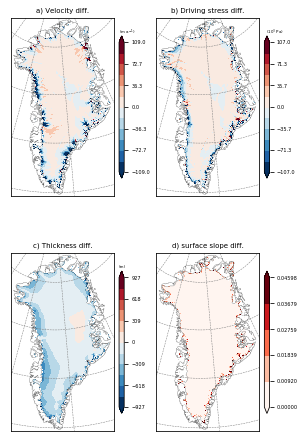

In [7]:
fw = 2.2 
left, right, top, bottom = 0.05, 0.3, 0.1, 0.05
wspace = 0.26
wcbar = 0.2
#w = (fw-wspace-wcbar-left-right)

ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddy.values/ddx.values
w = (fw*ratio-wspace-wcbar-left-right)

fh = w+top+bottom
#fh = 2.5
fig = plt.figure(figsize=(2*fw,2*fh))
gs = gridspec.GridSpec(2, 2,figure=fig) # ncols, nrows
gs.update(left=left/fw,right=1.-right/fw,bottom=bottom/fh,top=1.-top/fh,wspace=0.2) # => update de la grille pour faire des marges propres

gs1 = gs[0,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb = plt.subplot(gs1[0])

v_m=np.max((-1*np.nanmin(diff_v),np.nanmax(diff_v)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
bounds=np.arange(-1*v_m,v_m+step,step).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

im = plt.imshow(diff_v,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
# im = plt.imshow(diff_v,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
# y1=2171
# y2=2200
title_police=7
labs_cb=4

plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('a) Velocity diff.',fontsize=title_police)


# divider = make_axes_locatable(axcb)
# cax2 = divider.new_horizontal(size="5%", pad=0.2,)
# f.add_axes(cax2)
# cb2 = f.colorbar(axcb, cax=cax2, label = '$\Delta$ thickness (m)') 
axins = inset_axes(axcb, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im, cax=axins,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(1.05,.91,"(m $\mathrm{a^{-1}}$)",fontsize=labs_cb,transform=axcb.transAxes) 

###############################################

gs2 = gs[0,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb2 = plt.subplot(gs2[0])
diff_taur = diff_tau/1000.

v_m=np.max((-1*np.nanmin(diff_taur),np.nanmax(diff_taur)))/20
v_m = np.round(v_m)
step = (2*v_m)/12
bounds=np.arange(-1*v_m,v_m+step,step).tolist()
# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im2 = plt.imshow(diff_taur,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))

# im2 = plt.imshow(diff_taur,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('b) Driving stress diff.',fontsize=title_police)
axins2 = inset_axes(axcb2, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb2.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im2, cax=axins2,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(2.47,0.91,"($10^{3}$ Pa)",fontsize=labs_cb,transform=axcb.transAxes) 

########################################################
gs4 = gs[1,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb3 =plt.subplot(gs4[0])


v_m=np.max((-1*np.nanmin(diff_thk),np.nanmax(diff_thk)))/1.5
v_m = np.round(v_m)
step = (2*v_m)/12
bounds=np.arange(-1*v_m,v_m+step,step).tolist()
# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im3 = plt.imshow(diff_thk,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
# 
# im3 = plt.imshow(diff_thk,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)



plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('c) Thickness diff.',fontsize=title_police)
axins3 = inset_axes(axcb3, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb3.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im3, cax=axins3,extend='both')
cb.ax.tick_params(labelsize=5) 
plt.text(1.05,-0.4,"(m)",fontsize=labs_cb,transform=axcb.transAxes) 
############################################

gs5 = gs[1,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb4 = plt.subplot(gs5[0])


v_m=np.max((-1*np.nanmin(hs_diff),np.nanmax(hs_diff)))/5
bounds=np.arange(0,v_m,(2*v_m)/12).tolist()

cmap = cmap_Rd

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im4 = plt.imshow(hs_diff,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))


plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('d) surface slope diff.',fontsize=title_police)
axins4 = inset_axes(axcb4, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb4.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im4, cax=axins4,extend='both')
cb.ax.tick_params(labelsize=5) 

# cb.set_label('(m/s)', rotation=270)

fig.savefig('4panel_plot.png',dpi=150)

692.2578782857596


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


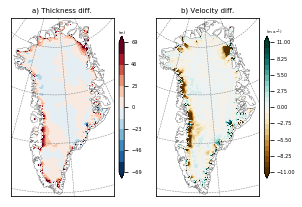

In [8]:
#like alison:
fw = 2.2 
left, right, top, bottom = 0.05, 0.3, 0.1, 0.05
wspace = 0.26
wcbar = 0.2
#w = (fw-wspace-wcbar-left-right)

ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddy.values/ddx.values
w = (fw*ratio-wspace-wcbar-left-right)

fh = w+top+bottom
#fh = 2.5
fig = plt.figure(figsize=(2*fw,1*fh))
gs = gridspec.GridSpec(1, 2,figure=fig) # ncols, nrows
gs.update(left=left/fw,right=1.-right/fw,bottom=bottom/fh,top=1.-top/fh,wspace=0.2) # => update de la grille pour faire des marges propres

gs1 = gs[0,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb = plt.subplot(gs1[0])


d_thke_standalone = da.read_nc(p_climato + 'marfix/'+'gris_4500m-2200.nc', 'thk')

d_thke_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'thk')
thk_0  = d_thke_standalone.values[0]
m1=thk_0 == 0
thk_e = d_thke_coupling.values[0]
m=thk_e == 0

thk_diff_cp = thk_e-thk_0
# m_ocean = m_i ==0
thk_diff_cp[m]= np.nan
thk_diff_cp[m1]= np.nan




# v_max = get_min_max(thk_diff_cp)
v_m=np.max((-1*np.nanmin(thk_diff_cp),np.nanmax(thk_diff_cp)))
print(v_m)
v_m = v_m/10

# v_m=np.max((-1*np.nanmin(diff_v),np.nanmax(diff_v)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
bounds=np.arange(-1*v_m,v_m+step,step).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

im = plt.imshow(thk_diff_cp,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
# im = plt.imshow(diff_v,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
# y1=2171
# y2=2200
title_police=7
labs_cb=4

plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('a) Thickness diff.',fontsize=title_police)


# divider = make_axes_locatable(axcb)
# cax2 = divider.new_horizontal(size="5%", pad=0.2,)
# f.add_axes(cax2)
# cb2 = f.colorbar(axcb, cax=cax2, label = '$\Delta$ thickness (m)') 
axins = inset_axes(axcb, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im, cax=axins,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(1.05,.91,"(m)",fontsize=labs_cb,transform=axcb.transAxes) 

###############################################

gs2 = gs[0,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb2 = plt.subplot(gs2[0])
# diff_taur = diff_tau/1000.
d_thk0 = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'velsurf_mag')
v_0 = d_thk0.values[0] 

# m0 =  da.read_nc(p_climato + 'gris_4500m-1990.nc', 'mask')
d_thke_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'velsurf_mag')
v_coupling = d_thke_coupling.values[0] 
# me_coupling = da.read_nc(p_climato +'coupling-1yr/'+ 'gris_4500m-2200.nc', 'mask')

d_thke_standalone = da.read_nc(p_climato + 'marfix/'+'gris_4500m-2200.nc', 'velsurf_mag')
v_standalone= d_thke_standalone.values[0]
v_d = v_coupling-v_standalone

v_m=np.max((-1*np.nanmin(v_d),np.nanmax(v_d)))/1000
v_m = np.round(v_m)
step = (2*v_m)/24
bounds=np.arange(-1*v_m,v_m+step,step).tolist()
# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_div

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im2 = plt.imshow(v_d,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))

# im2 = plt.imshow(diff_taur,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('b) Velocity diff.',fontsize=title_police)
axins2 = inset_axes(axcb2, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb2.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im2, cax=axins2,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(2.47,0.91,"(m $\mathrm{a^{-1}}$)",fontsize=labs_cb,transform=axcb.transAxes) 



# cb.set_label('(m/s)', rotation=270)

fig.savefig('2panel_plot.png',dpi=150)
    
    

1743.3561691288078


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


average difference in velocity  -7.0084968
maximum difference in velocity  4489.967


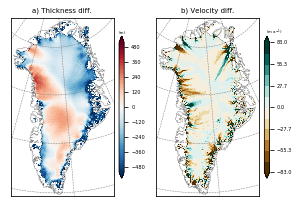

In [75]:
#like alison:
# bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
bed_orig = '/home/beckmann/mnt/cluhome//icedata/pism_greenland_input/BedMachine/pism_Greenland_4500m_mcb_jpl_v_no_bath.nc'
path_to_rignot = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/rignot_basins/'
do = da.read_nc(bed_orig,'thickness')
m = do.values <1

d_thk0spinup = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'thk')
# m0 =  da.read_nc(p_climato + 'gris_4500m-1990.nc', 'mask')
d_velspinup=da.read_nc(p_climato + 'gris_4500m-1990.nc', 'velsurf_mag')
fw = 2.2 
left, right, top, bottom = 0.05, 0.3, 0.1, 0.05
wspace = 0.26
wcbar = 0.2
#w = (fw-wspace-wcbar-left-right)

ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddy.values/ddx.values
w = (fw*ratio-wspace-wcbar-left-right)

fh = w+top+bottom
#fh = 2.5
fig = plt.figure(figsize=(2*fw,1*fh))
gs = gridspec.GridSpec(1, 2,figure=fig) # ncols, nrows
gs.update(left=left/fw,right=1.-right/fw,bottom=bottom/fh,top=1.-top/fh,wspace=0.2) # => update de la grille pour faire des marges propres

gs1 = gs[0,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb = plt.subplot(gs1[0])



do = da.read_nc(bed_orig,'thickness')
thko = do.values.astype('float')
thko_orig = thko.copy()
m = thko <1
# thko[m] = np.nan
thko_orig[m]=np.nan
# thko[~m] = 1

####
thk0 = d_thk0spinup.values[0,]

m =thk0 < 1
thk0[m]=np.nan
thk0_orig = thk0.copy()
# # thk0[~m]=1
diff_spinup_thk = thko_orig-thk0_orig
# # diff_spinup_thk[m] = np.nan



# v_max = get_min_max(thk_diff_cp)
v_m=np.max((-1*np.nanmin(diff_spinup_thk ),np.nanmax(diff_spinup_thk )))
print(v_m)
# v_m = v_m/10

# v_m=np.max((-1*np.nanmin(diff_v),np.nanmax(diff_v)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
# bounds=np.arange(-1*v_m,v_m+step,step).tolist()
step=2 *540/12
bounds=np.arange(-520,540,20).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

im = plt.imshow(diff_spinup_thk ,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
# im = plt.imshow(diff_v,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
# y1=2171
# y2=2200
title_police=7
labs_cb=4

plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('a) Thickness diff.',fontsize=title_police)


# divider = make_axes_locatable(axcb)
# cax2 = divider.new_horizontal(size="5%", pad=0.2,)
# f.add_axes(cax2)
# cb2 = f.colorbar(axcb, cax=cax2, label = '$\Delta$ thickness (m)') 
axins = inset_axes(axcb, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im, cax=axins,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(1.05,.91,"(m)",fontsize=labs_cb,transform=axcb.transAxes) 

###############################################

gs2 = gs[0,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb2 = plt.subplot(gs2[0])
# diff_taur = diff_tau/1000.
###vel
d2 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/data_greenland/Velocity/results/pism_velocity_greenland_15Feb2013_4500m.nc')
vel_obs = (d2['vy']**2 +d2['vx']**2)**0.5
vel_obs[m]=np.nan
##
vel0 = d_velspinup.values[0,]
vel0[m]=np.nan

vel_diff = (vel_obs -vel0)
vvel2 = np.nanmax(np.abs(vel_diff))/100 
v_m=np.max((-1*np.nanmin(vel_diff),np.nanmax(vel_diff)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
bounds=np.arange(-1*v_m,v_m+step,step).tolist()
# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_div

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im2 = plt.imshow(vel_diff,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))

# im2 = plt.imshow(diff_taur,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('b) Velocity diff.',fontsize=title_police)
axins2 = inset_axes(axcb2, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb2.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im2, cax=axins2,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(2.47,0.91,"(m $\mathrm{a^{-1}}$)",fontsize=labs_cb,transform=axcb.transAxes) 


# cb.set_label('(m/s)', rotation=270)

fig.savefig('2panel_spinup_plot.pdf',dpi=150)
fig.savefig('2panel_spinup_plot.png',dpi=150)

    

print('average difference in velocity ', np.nanmean(vel_diff))
print('maximum difference in velocity ', np.nanmax(vel_diff))


### with basins

In [76]:
d_basin = da.read_nc(path_to_rignot +'basins_rignot_4500m_nb.nc') 
list_basin = [
'NW_1',
    'CW_2',
'SW_3',
'SE_4',
    'NE_5',
'NO_6'
]

y,x=d_basin['basins'].shape
basins = np.zeros((y,x))
for i in range(len(list_basin)):
    b_i =d_basin[list_basin[i]].values
    m_i = b_i ==0
    basins[~m_i] = i+1
m = basins == 0
basins[m]=np.nan
basins.dump(path_to_rignot+ 'basins_thk' )


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/dimarray/io/nc.py:624: RuntimeWarning: 'nv4' dimension not found, define integer range
  warnings.warn(msg, RuntimeWarning)


1743.3561691288078


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


average difference in velocity  -7.0084968
maximum difference in velocity  4489.967


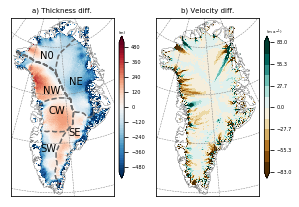

In [77]:
#like alison:
# bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
bed_orig = '/home/beckmann/mnt/cluhome//icedata/pism_greenland_input/BedMachine/pism_Greenland_4500m_mcb_jpl_v_no_bath.nc'
path_to_rignot = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/rignot_basins/'
do = da.read_nc(bed_orig,'thickness')
m = do.values <1

d_thk0spinup = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'thk')
# m0 =  da.read_nc(p_climato + 'gris_4500m-1990.nc', 'mask')
d_velspinup=da.read_nc(p_climato + 'gris_4500m-1990.nc', 'velsurf_mag')
fw = 2.2 
left, right, top, bottom = 0.05, 0.3, 0.1, 0.05
wspace = 0.26
wcbar = 0.2
#w = (fw-wspace-wcbar-left-right)

ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddy.values/ddx.values
w = (fw*ratio-wspace-wcbar-left-right)

fh = w+top+bottom
#fh = 2.5
fig = plt.figure(figsize=(2*fw,1*fh))
gs = gridspec.GridSpec(1, 2,figure=fig) # ncols, nrows
gs.update(left=left/fw,right=1.-right/fw,bottom=bottom/fh,top=1.-top/fh,wspace=0.2) # => update de la grille pour faire des marges propres

gs1 = gs[0,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb = plt.subplot(gs1[0])



do = da.read_nc(bed_orig,'thickness')
thko = do.values.astype('float')
thko_orig = thko.copy()
m = thko <1
# thko[m] = np.nan
thko_orig[m]=np.nan
# thko[~m] = 1

####
thk0 = d_thk0spinup.values[0,]

m =thk0 < 1
thk0[m]=np.nan
thk0_orig = thk0.copy()
# # thk0[~m]=1
diff_spinup_thk = thko_orig-thk0_orig
# # diff_spinup_thk[m] = np.nan
m_thk = m


# v_max = get_min_max(thk_diff_cp)
v_m=np.max((-1*np.nanmin(diff_spinup_thk ),np.nanmax(diff_spinup_thk )))
print(v_m)
# v_m = v_m/10

# v_m=np.max((-1*np.nanmin(diff_v),np.nanmax(diff_v)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
# bounds=np.arange(-1*v_m,v_m+step,step).tolist()
step=2 *540/12
bounds=np.arange(-520,540,20).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

im = plt.imshow(diff_spinup_thk ,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
axcb.contour(basins, origin = 'lower',levels = [1,2,3,4,5,6], colors = 'dimgrey', linestyles= '--', linewidth = 1,)
fsi=10
axcb.text(100,470,'N0',fontsize = fsi)
axcb.text(110,350,'NW',fontsize = fsi)
axcb.text(200,380,'NE',fontsize = fsi)
axcb.text(130,280,'CW',fontsize = fsi)
axcb.text(100,150,'SW',fontsize = fsi)
axcb.text(195,205,'SE',fontsize = fsi)

# im = plt.imshow(diff_v,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
# y1=2171
# y2=2200
title_police=7
labs_cb=4

plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('a) Thickness diff.',fontsize=title_police)


# divider = make_axes_locatable(axcb)
# cax2 = divider.new_horizontal(size="5%", pad=0.2,)
# f.add_axes(cax2)
# cb2 = f.colorbar(axcb, cax=cax2, label = '$\Delta$ thickness (m)') 
axins = inset_axes(axcb, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im, cax=axins,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(1.05,.91,"(m)",fontsize=labs_cb,transform=axcb.transAxes) 

###############################################

gs2 = gs[0,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb2 = plt.subplot(gs2[0])
# diff_taur = diff_tau/1000.
###vel
d2 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/data_greenland/Velocity/results/pism_velocity_greenland_15Feb2013_4500m.nc')
vel_obs = (d2['vy']**2 +d2['vx']**2)**0.5
vel_obs[m]=np.nan
##
vel0 = d_velspinup.values[0,]
vel0[m]=np.nan

vel_diff = (vel_obs -vel0)
vvel2 = np.nanmax(np.abs(vel_diff))/100 
v_m=np.max((-1*np.nanmin(vel_diff),np.nanmax(vel_diff)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
bounds=np.arange(-1*v_m,v_m+step,step).tolist()
# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_div

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im2 = plt.imshow(vel_diff,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))

# im2 = plt.imshow(diff_taur,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('b) Velocity diff.',fontsize=title_police)
axins2 = inset_axes(axcb2, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb2.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im2, cax=axins2,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(2.47,0.91,"(m $\mathrm{a^{-1}}$)",fontsize=labs_cb,transform=axcb.transAxes) 


# cb.set_label('(m/s)', rotation=270)

fig.savefig('2panel_spinup_plot_basin.pdf',dpi=150)
fig.savefig('2panel_spinup_plot_basin.png',dpi=150)

    

print('average difference in velocity ', np.nanmean(vel_diff))
print('maximum difference in velocity ', np.nanmax(vel_diff))


In [72]:
nbase = np.load(path_to_rignot +'basins_thk',allow_pickle=True)
list_basin = [
'NW_1',
    'CW_2',
'SW_3',
'SE_4',
    'NE_5',
'NO_6'
]

NW_1=[]
CW_2=[]
SW_3=[]
SE_4=[]
NE_5=[]
NO_6=[]
dic ={}


for i,name in enumerate(list_basin):
    m_base =nbase == i+1
    mbi = m_base.astype('int')
    val = np.nanmean(diff_spinup_thk[m_base])

    eval(name).append(val)
    dic[name] = eval(name)


In [78]:
dic

{'NW_1': [69.60376843637135],
 'CW_2': [94.87332481804694],
 'SW_3': [-98.72222648669504],
 'SE_4': [-104.03891906018394],
 'NE_5': [-200.54767012468912],
 'NO_6': [-98.31206817435208]}

In [79]:
def norm_cmap_log(cmap,vmin,vmax):
    norm = mpl.colors.LogNorm(vmin,vmax, cmap.N)
    return norm


1743.3561691288078


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


maximum thickness  3391.0
maximum  velocity  6331.3066


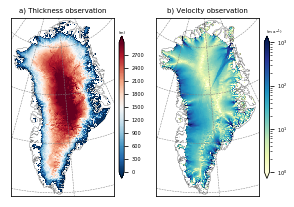

In [83]:
#like alison:
# bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
bed_orig = '/home/beckmann/mnt/cluhome//icedata/pism_greenland_input/BedMachine/pism_Greenland_4500m_mcb_jpl_v_no_bath.nc'

d_thk0spinup = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'thk')
# m0 =  da.read_nc(p_climato + 'gris_4500m-1990.nc', 'mask')
d_velspinup=da.read_nc(p_climato + 'gris_4500m-1990.nc', 'velsurf_mag')
fw = 2.2 
left, right, top, bottom = 0.05, 0.3, 0.1, 0.05
wspace = 0.26
wcbar = 0.2
#w = (fw-wspace-wcbar-left-right)

ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddy.values/ddx.values
w = (fw*ratio-wspace-wcbar-left-right)

fh = w+top+bottom
#fh = 2.5
fig = plt.figure(figsize=(2*fw,1*fh))
gs = gridspec.GridSpec(1, 2,figure=fig) # ncols, nrows
gs.update(left=left/fw,right=1.-right/fw,bottom=bottom/fh,top=1.-top/fh,wspace=0.2) # => update de la grille pour faire des marges propres

gs1 = gs[0,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb = plt.subplot(gs1[0])



do = da.read_nc(bed_orig,'thickness')
thko = do.values.astype('float')
thko_orig = thko.copy()
m = thko <1
# thko[m] = np.nan
thko_orig[m]=np.nan
# thko[~m] = 1

####
thk0 = d_thk0spinup.values[0,]

m =thk0 < 1
thk0[m]=np.nan
thk0_orig = thk0.copy()
# # thk0[~m]=1
diff_spinup_thk = thko_orig-thk0_orig
# # diff_spinup_thk[m] = np.nan



# v_max = get_min_max(thk_diff_cp)
v_m=np.max((-1*np.nanmin(diff_spinup_thk ),np.nanmax(diff_spinup_thk )))
print(v_m)
# v_m = v_m/10

# v_m=np.max((-1*np.nanmin(diff_v),np.nanmax(diff_v)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
# bounds=np.arange(-1*v_m,v_m+step,step).tolist()
bounds=np.arange(0,3000,20).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

im = plt.imshow(thko_orig ,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
# im = plt.imshow(diff_v,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
# y1=2171
# y2=2200
title_police=7
labs_cb=4

plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('a) Thickness observation',fontsize=title_police)


# divider = make_axes_locatable(axcb)
# cax2 = divider.new_horizontal(size="5%", pad=0.2,)
# f.add_axes(cax2)
# cb2 = f.colorbar(axcb, cax=cax2, label = '$\Delta$ thickness (m)') 
axins = inset_axes(axcb, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im, cax=axins,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(1.05,.91,"(m)",fontsize=labs_cb,transform=axcb.transAxes) 

###############################################

gs2 = gs[0,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb2 = plt.subplot(gs2[0])
# diff_taur = diff_tau/1000.
###vel
d2 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/data_greenland/Velocity/results/pism_velocity_greenland_15Feb2013_4500m.nc')
vel_obs = (d2['vy']**2 +d2['vx']**2)**0.5
vel_obs[m]=np.nan
##
vel0 = d_velspinup.values[0,]
vel0[m]=np.nan

vel_diff = (vel_obs -vel0)
vvel2 = np.nanmax(np.abs(vel_diff))/100 
v_m=np.max((-1*np.nanmin(vel_diff),np.nanmax(vel_diff)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
v_min = 1
v_max = 1000
# bounds=np.arange(1,4000,step).tolist()
# bounds=np.logspace(1,4000).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_smb

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im2 = plt.imshow(vel_obs,origin = 'lower',cmap=cmap,norm=norm_cmap_log(cmap,v_min,v_max))

# im2 = plt.imshow(diff_taur,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('b) Velocity observation',fontsize=title_police)
axins2 = inset_axes(axcb2, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb2.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im2, cax=axins2,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(2.47,0.91,"(m $\mathrm{a^{-1}}$)",fontsize=labs_cb,transform=axcb.transAxes) 


# cb.set_label('(m/s)', rotation=270)

fig.savefig('2panel_obs_log.png',dpi=150)
    

print('maximum thickness ', np.nanmax(thko_orig))
print('maximum  velocity ', np.nanmax(vel_obs))


1743.3561691288078


/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


maximum thickness  3391.0
maximum  velocity  6331.3066


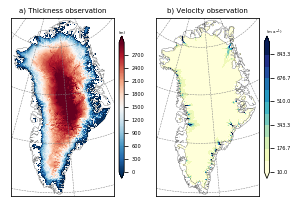

In [84]:
#like alison:
# bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
bed_orig = '/home/beckmann/mnt/cluhome//icedata/pism_greenland_input/BedMachine/pism_Greenland_4500m_mcb_jpl_v_no_bath.nc'

d_thk0spinup = da.read_nc(p_climato + 'gris_4500m-1990.nc', 'thk')
# m0 =  da.read_nc(p_climato + 'gris_4500m-1990.nc', 'mask')
d_velspinup=da.read_nc(p_climato + 'gris_4500m-1990.nc', 'velsurf_mag')
fw = 2.2 
left, right, top, bottom = 0.05, 0.3, 0.1, 0.05
wspace = 0.26
wcbar = 0.2
#w = (fw-wspace-wcbar-left-right)

ddx = XX[0]-XX[-1]
ddy = YY[0]-YY[-1]
ratio = ddy.values/ddx.values
w = (fw*ratio-wspace-wcbar-left-right)

fh = w+top+bottom
#fh = 2.5
fig = plt.figure(figsize=(2*fw,1*fh))
gs = gridspec.GridSpec(1, 2,figure=fig) # ncols, nrows
gs.update(left=left/fw,right=1.-right/fw,bottom=bottom/fh,top=1.-top/fh,wspace=0.2) # => update de la grille pour faire des marges propres

gs1 = gs[0,0].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
axcb = plt.subplot(gs1[0])



do = da.read_nc(bed_orig,'thickness')
thko = do.values.astype('float')
thko_orig = thko.copy()
m = thko <1
# thko[m] = np.nan
thko_orig[m]=np.nan
# thko[~m] = 1

####
thk0 = d_thk0spinup.values[0,]

m =thk0 < 1
thk0[m]=np.nan
thk0_orig = thk0.copy()
# # thk0[~m]=1
diff_spinup_thk = thko_orig-thk0_orig
# # diff_spinup_thk[m] = np.nan



# v_max = get_min_max(thk_diff_cp)
v_m=np.max((-1*np.nanmin(diff_spinup_thk ),np.nanmax(diff_spinup_thk )))
print(v_m)
# v_m = v_m/10

# v_m=np.max((-1*np.nanmin(diff_v),np.nanmax(diff_v)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
# bounds=np.arange(-1*v_m,v_m+step,step).tolist()
bounds=np.arange(0,3000,20).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_BuRd

im = plt.imshow(thko_orig ,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))
# im = plt.imshow(diff_v,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
# y1=2171
# y2=2200
title_police=7
labs_cb=4

plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('a) Thickness observation',fontsize=title_police)


# divider = make_axes_locatable(axcb)
# cax2 = divider.new_horizontal(size="5%", pad=0.2,)
# f.add_axes(cax2)
# cb2 = f.colorbar(axcb, cax=cax2, label = '$\Delta$ thickness (m)') 
axins = inset_axes(axcb, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im, cax=axins,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(1.05,.91,"(m)",fontsize=labs_cb,transform=axcb.transAxes) 

###############################################

gs2 = gs[0,1].subgridspec(1, 2, width_ratios=[1.,wcbar/w])
#### 1 [0,0] ######
axcb2 = plt.subplot(gs2[0])
# diff_taur = diff_tau/1000.
###vel
d2 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/data_greenland/Velocity/results/pism_velocity_greenland_15Feb2013_4500m.nc')
vel_obs = (d2['vy']**2 +d2['vx']**2)**0.5
vel_obs[m]=np.nan
##
vel0 = d_velspinup.values[0,]
vel0[m]=np.nan

vel_diff = (vel_obs -vel0)
vvel2 = np.nanmax(np.abs(vel_diff))/100 
v_m=np.max((-1*np.nanmin(vel_diff),np.nanmax(vel_diff)))/100
v_m = np.round(v_m)
step = (2*v_m)/12
v_min = 1
v_max = 4000
step = 1000/12
bounds=np.arange(10,1000,step).tolist()
# bounds=np.logspace(1,4000).tolist()

# bounds=np.arange(-1*v_m,v_m,(2*v_m)/20).tolist()

cmap = cmap_smb

# im4 = plt.imshow(hs_diff,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
im2 = plt.imshow(vel_obs,origin = 'lower',cmap=cmap,norm=norm_cmap(cmap,bounds))

# im2 = plt.imshow(diff_taur,origin = 'lower',cmap = "RdBu_r",vmin =-1*v_m,vmax=v_m)
plt.contour(x2D,y2D,lat,np.linspace(60,80,4),linewidths=0.5,linestyles='--',colors='gray')
plt.contour(x2D,y2D,lon,np.linspace(-80,-20,4),linewidths=0.5,linestyles='--',colors='gray')
plt.tick_params(bottom = False,left=False) 
plt.contour(x2D,y2D,land2,[0.5],linewidths=0.2,colors='k')
plt.contour(x2D,y2D,ice2200,[0.5],linewidths=0.2,colors='k')   
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])

# ax.set_xticks([])
plt.tick_params(bottom = False,left=False) 
plt.title('b) Velocity observation',fontsize=title_police)
axins2 = inset_axes(axcb2, # here using axis of the lowest plot
               width="5%",  # width = 5% of parent_bbox width
               height="80%",  # height : 340% good for a (4x4) Grid
               loc='lower left',
               bbox_to_anchor=(1.05, 0.1, 1, 1),
               bbox_transform=axcb2.transAxes,
               borderpad=0,
               )

cb = fig.colorbar(im2, cax=axins2,extend='both')
cb.ax.tick_params(labelsize=5) 
# cb.set_label('(m/s)', rotation=270)
plt.text(2.47,0.91,"(m $\mathrm{a^{-1}}$)",fontsize=labs_cb,transform=axcb.transAxes) 


# cb.set_label('(m/s)', rotation=270)

fig.savefig('2panel_obs:10-1000.png',dpi=150)
    

print('maximum thickness ', np.nanmax(thko_orig))
print('maximum  velocity ', np.nanmax(vel_obs))


In [25]:
norm_cmap(cmap,bounds)

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


orig-spinup thk RMSE 224.02
RMSE 113.47


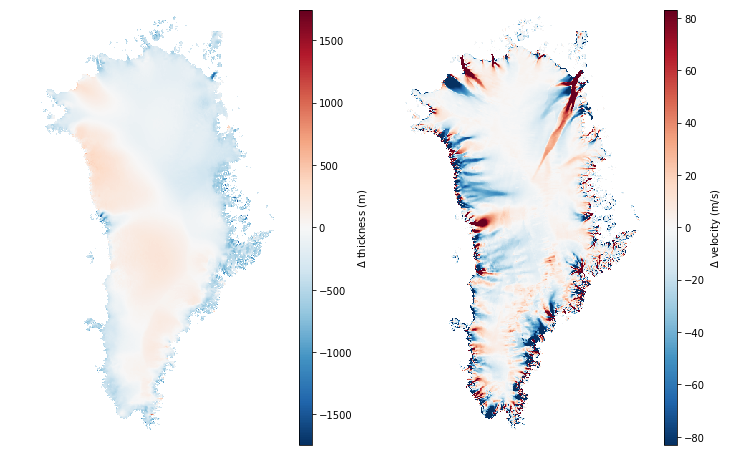

In [13]:
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
# bed_orig = '/home/beckmann/mnt/cluhome//icedata/pism_greenland_input/BedMachine/pism_Greenland_4500m_mcb_jpl_v_no_bath.nc'

do = da.read_nc(bed_orig,'thickness')
thko = do.values.astype('float')
thko_orig = thko.copy()
m = thko <1
# thko[m] = np.nan
thko_orig[m]=np.nan
# thko[~m] = 1

####
thk0 = d_thk0spinup.values[0,]

m =thk0 < 1
thk0[m]=np.nan
thk0_orig = thk0.copy()
# # thk0[~m]=1
diff_spinup_thk = thko_orig-thk0_orig
# # diff_spinup_thk[m] = np.nan

###vel
d2 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/data_greenland/Velocity/results/pism_velocity_greenland_15Feb2013_4500m.nc')
vel_obs = (d2['vy']**2 +d2['vx']**2)**0.5
vel_obs[m]=np.nan
##
vel0 = d_velspinup.values[0,]
vel0[m]=np.nan



####plot
f, ax = plt.subplots(1,2,sharey = True, figsize = (12,8) )
vvel2 = np.nanmax(np.abs(diff_spinup_thk))
im1 = ax[0].imshow(diff_spinup_thk, cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-vvel2,vmax=vvel2)
print('orig-spinup thk RMSE '+str(np.round((np.nanmean(diff_spinup_thk**2))**0.5,2)))
# vvel2 = np.nanmax(np.abs(vel_diff))/10

# im2 = ax[1].imshow(vel_diff, cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-vvel2,vmax=vvel2)
# ax[1].set_title('RMSE '+str(np.round((np.nanmean(vel_diff**2))**0.5,2)))

divider = make_axes_locatable(ax[0])
cax2 = divider.new_horizontal(size="5%", pad=0.2,)
f.add_axes(cax2)
cb2 = f.colorbar(im1, cax=cax2, label = '$\Delta$ thickness (m)')
vel_diff = (vel_obs -vel0)
vvel2 = np.nanmax(np.abs(vel_diff))/100


im2 = ax[1].imshow(vel_diff, cmap = "RdBu_r",label = 'diff',origin = "lower",vmin = -vvel2,vmax =vvel2,)
# ax[1].set_title('obs. - initial state ')
print('RMSE '+str(np.round((np.nanmean(vel_diff**2))**0.5,2)))
divider = make_axes_locatable(ax[1])
cax2 = divider.new_horizontal(size="5%", pad=0.2,)
f.add_axes(cax2)
cb2 = f.colorbar(im2, cax=cax2, label = '$\Delta$ velocity (m/s)')

ax[0].set_axis_off()
ax[1].set_axis_off()
f.savefig('./pics/SI_deltathk_vel.pdf')


In [19]:
np.nanmax(vel_obs.values)

6331.3066

/home/beckmann/virtualenvironment/vpy3/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


orig-spinup thk RMSE 224.02
RMSE 113.47


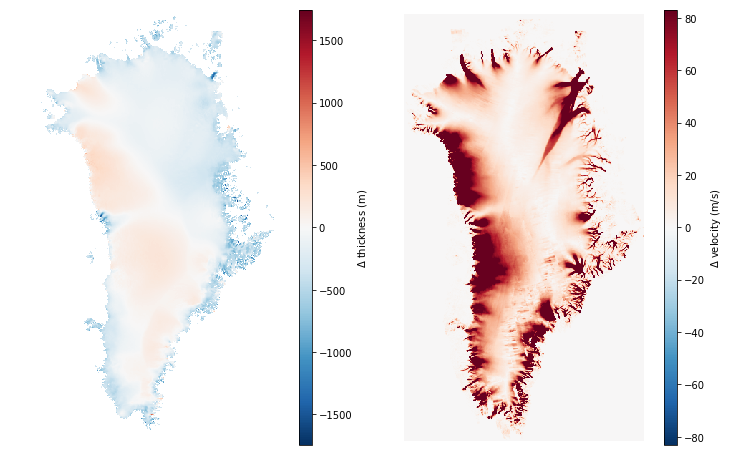

In [16]:
bed_orig = '/home/beckmann/mnt/cluhome/exp_pism/my_first_runs/input_data/pism_Greenland_4500m_mcb_jpl_v_no_bath_plus_beddef.nc'
# bed_orig = '/home/beckmann/mnt/cluhome//icedata/pism_greenland_input/BedMachine/pism_Greenland_4500m_mcb_jpl_v_no_bath.nc'

do = da.read_nc(bed_orig,'thickness')
thko = do.values.astype('float')
thko_orig = thko.copy()
m = thko <1
# thko[m] = np.nan
thko_orig[m]=np.nan
# thko[~m] = 1

####
thk0 = d_thk0spinup.values[0,]

m =thk0 < 1
thk0[m]=np.nan
thk0_orig = thk0.copy()
# # thk0[~m]=1
diff_spinup_thk = thko_orig-thk0_orig
# # diff_spinup_thk[m] = np.nan

###vel
d2 = da.read_nc('/home/beckmann/mnt/cluhome/icedata/data_greenland/Velocity/results/pism_velocity_greenland_15Feb2013_4500m.nc')
vel_obs = (d2['vy']**2 +d2['vx']**2)**0.5
vel_obs[m]=np.nan
##
vel0 = d_velspinup.values[0,]
vel0[m]=np.nan



####plot
f, ax = plt.subplots(1,2,sharey = True, figsize = (12,8) )
vvel2 = np.nanmax(np.abs(diff_spinup_thk))
im1 = ax[0].imshow(diff_spinup_thk, cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-vvel2,vmax=vvel2)
print('orig-spinup thk RMSE '+str(np.round((np.nanmean(diff_spinup_thk**2))**0.5,2)))
# vvel2 = np.nanmax(np.abs(vel_diff))/10

# im2 = ax[1].imshow(vel_diff, cmap = "RdBu_r",label = 'diff',origin = "lower",vmin=-vvel2,vmax=vvel2)
# ax[1].set_title('RMSE '+str(np.round((np.nanmean(vel_diff**2))**0.5,2)))

divider = make_axes_locatable(ax[0])
cax2 = divider.new_horizontal(size="5%", pad=0.2,)
f.add_axes(cax2)
cb2 = f.colorbar(im1, cax=cax2, label = '$\Delta$ thickness (m)')
vel_diff = (vel_obs -vel0)
vvel2 = np.nanmax(np.abs(vel_diff))/100


im2 = ax[1].imshow(vel_obs, cmap = "RdBu_r",label = 'diff',origin = "lower",vmin = -vvel2,vmax =vvel2,)
# ax[1].set_title('obs. - initial state ')
print('RMSE '+str(np.round((np.nanmean(vel_diff**2))**0.5,2)))
divider = make_axes_locatable(ax[1])
cax2 = divider.new_horizontal(size="5%", pad=0.2,)
f.add_axes(cax2)
cb2 = f.colorbar(im2, cax=cax2, label = '$\Delta$ velocity (m/s)')

ax[0].set_axis_off()
ax[1].set_axis_off()
f.savefig('./pics/SI_deltathk_vel.pdf')
